In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

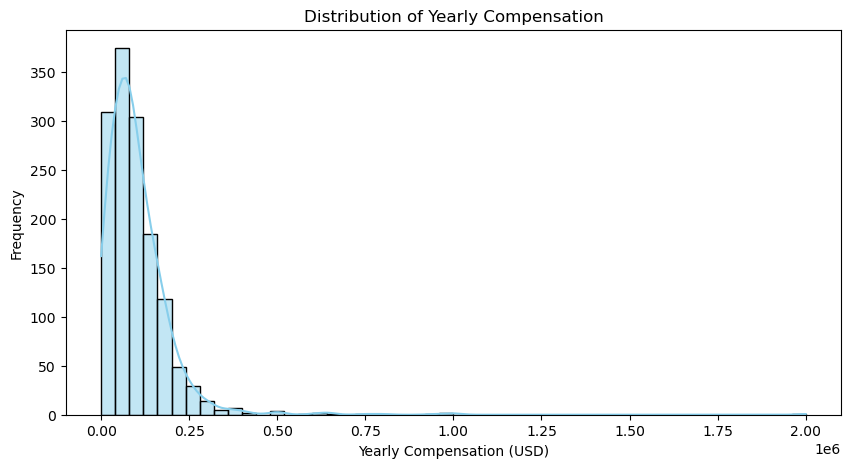

In [6]:
# Drop NaN values for accurate visualization
comp_data = data['ConvertedCompYearly'].dropna()

# Plot Histogram & KDE
plt.figure(figsize=(10, 5))

sns.histplot(comp_data, bins=50, kde=True, color='skyblue')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation')

plt.show()

In [8]:
# Filter for full-time employees
full_time_data = data[data['Employment'] == 'Employed, full-time']

# Drop NaN values in salary column
full_time_salary = full_time_data['ConvertedCompYearly'].dropna()

# Calculate median compensation
median_salary = full_time_salary.median()

print(f"Median Yearly Compensation for Full-Time Employees: ${median_salary:,.2f}")

Median Yearly Compensation for Full-Time Employees: $87,500.00


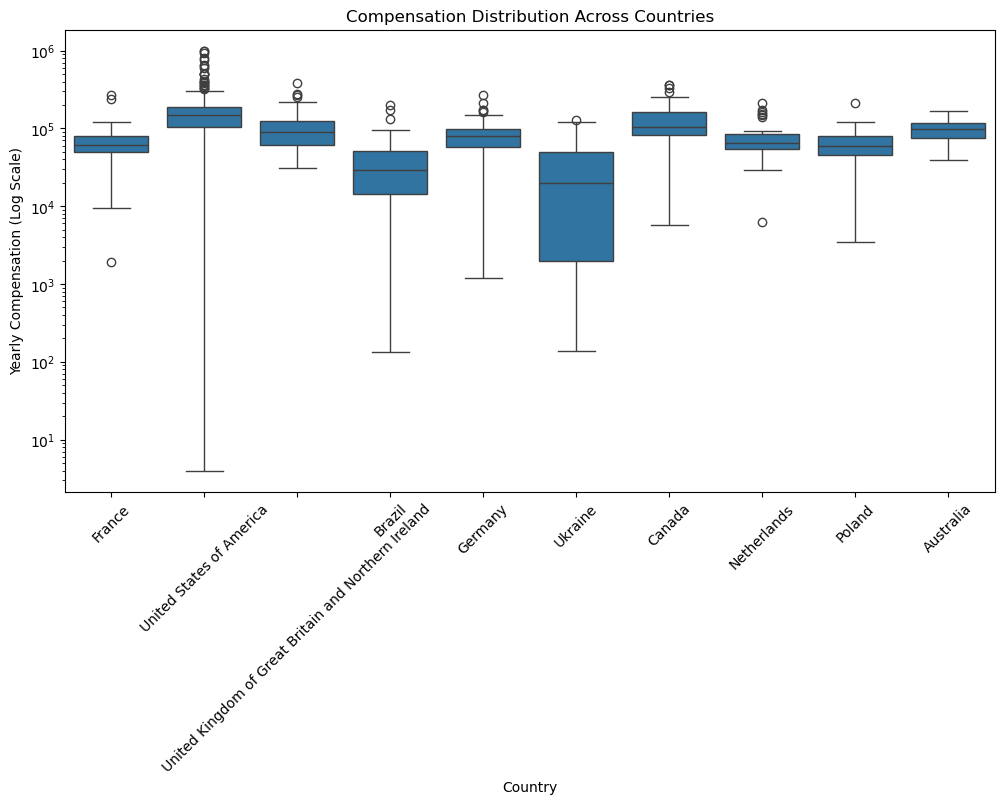

In [10]:
# Filter necessary columns and drop missing values
comp_by_country = data[['Country', 'ConvertedCompYearly']].dropna()

# Select top 10 countries with the most respondents for better visualization
top_countries = comp_by_country['Country'].value_counts().nlargest(10).index
comp_by_country = comp_by_country[comp_by_country['Country'].isin(top_countries)]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='Country', y='ConvertedCompYearly', data=comp_by_country)
plt.xticks(rotation=45)  # Rotate country labels for readability
plt.yscale("log")  # Use log scale for better visibility of differences
plt.title("Compensation Distribution Across Countries")
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (Log Scale)")
plt.show()

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['ConvertedCompYearly'].quantile(0.25)
Q3 = data['ConvertedCompYearly'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_filtered = data[(data['ConvertedCompYearly'] >= lower_bound) & (data['ConvertedCompYearly'] <= upper_bound)]

# Validate new DataFrame size
print(f"Original dataset size: {data.shape[0]}")
print(f"New dataset size after removing outliers: {data_filtered.shape[0]}")

# Save the refined dataset
data_filtered.to_csv("Refined_Dataset.csv", index=False)

Original dataset size: 2892
New dataset size after removing outliers: 1365


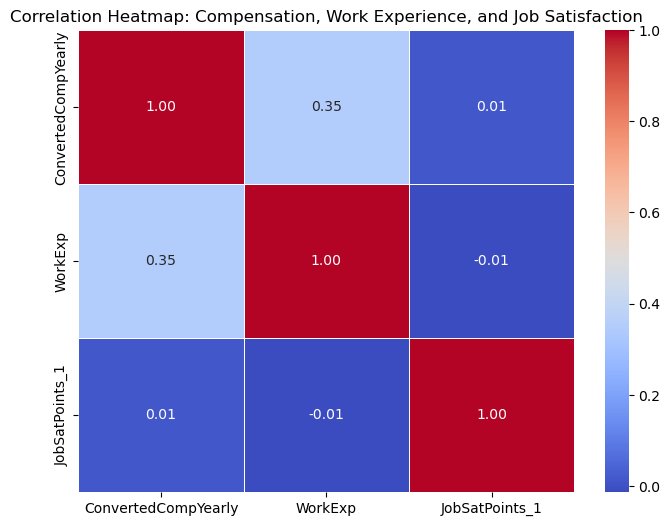

In [16]:
# Select relevant columns
correlation_data = data_filtered[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction")
plt.show()

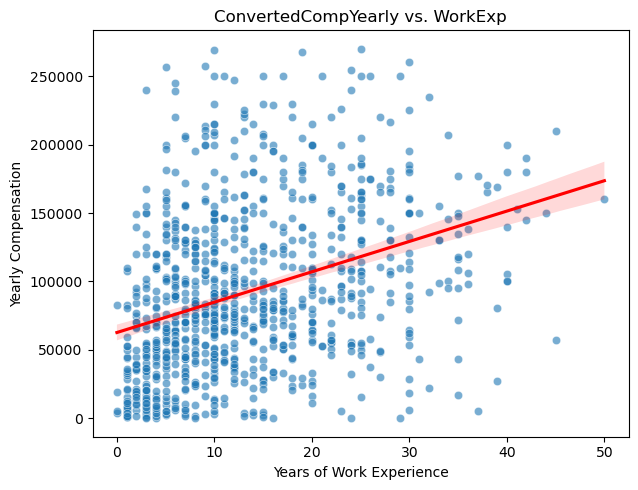

In [22]:
plt.figure(figsize=(12, 5))
#Compensation vs. Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_filtered, x='WorkExp', y='ConvertedCompYearly', alpha=0.6)
sns.regplot(data=data_filtered, x='WorkExp', y='ConvertedCompYearly', scatter=False, color='red')
plt.title("ConvertedCompYearly vs. WorkExp")
plt.xlabel("Years of Work Experience")
plt.ylabel("Yearly Compensation")
plt.tight_layout()
plt.show()

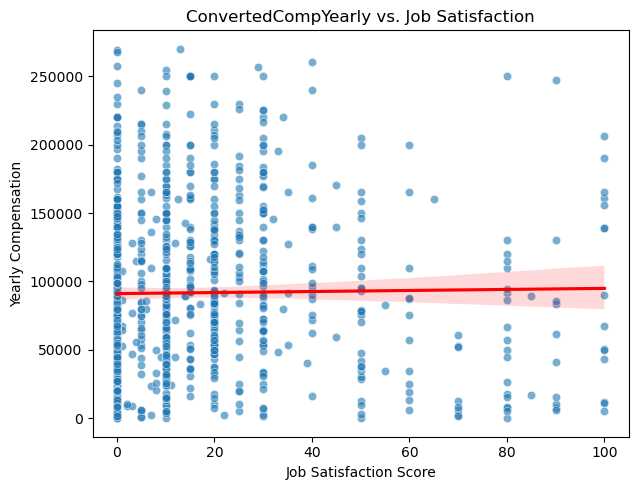

In [24]:
#Compensation vs. Job Satisfaction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_filtered, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6)
sns.regplot(data=data_filtered, x='JobSatPoints_1', y='ConvertedCompYearly', scatter=False, color='red')
plt.title("ConvertedCompYearly vs. Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation")
plt.tight_layout()
plt.show()